![New York City schoolbus]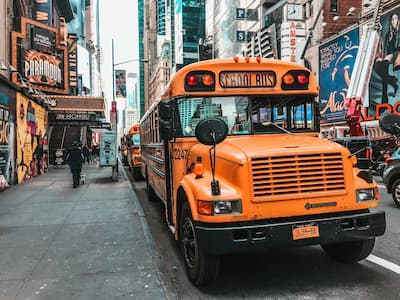

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [56]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
import os
print(os.listdir(r"C:\Users\NEW USER\anaconda_projects"))

['amir_deals.csv', 'clean_books.csv', 'clean_unemployment.csv', 'countries-of-the-world.csv', 'db', 'divorce.csv', 'ds_salaries_clean.csv', 'employee_data.xlsx', 'food_consumption.csv', 'mpg.csv', 'netflix_data.csv', 'nobel.csv', 'planes.csv', 'PYTHON DATA ANALYSIS', 'schools.csv', 'student_alcohol_consumption.csv', 'world_happiness.csv', 'young-people-survey-responses.csv']


                                           school_name    borough  \
0    New Explorations into Science, Technology and ...  Manhattan   
1                                 Essex Street Academy  Manhattan   
2                         Lower Manhattan Arts Academy  Manhattan   
3      High School for Dual Language and Asian Studies  Manhattan   
4        Henry Street School for International Studies  Manhattan   
..                                                 ...        ...   
370  Queens High School for Information, Research, ...     Queens   
371  Rockaway Park High School for Environmental Su...     Queens   
372                   Channel View School for Research     Queens   
373                    Rockaway Collegiate High School     Queens   
374                                  Scholars' Academy     Queens   

    building_code  average_math  average_reading  average_writing  \
0            M022           657              601              601   
1            M445           395  

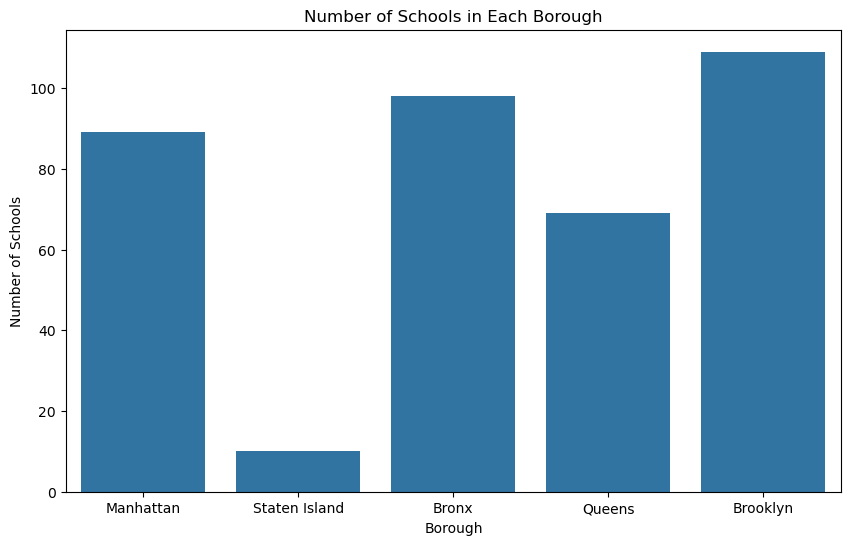

In [58]:
# Import DataFrame
school = pd.read_csv(r'C:\Users\NEW USER\anaconda_projects\schools.csv')
print(school)
# Getting to know my data
print(school.info())

# Gaining a quick understanding of data included in numerical columns 
print(school.describe())

# validating numerical columns
print(school.select_dtypes("number").head())

#Number of data points in each category
print(school[["borough"]].value_counts())
# Visualizing the number of schools in each borough
plt.figure(figsize=(10,6))
sns.countplot(data=school, x="borough")
plt.title("Number of Schools in Each Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.show()


#### Dealing with missing values

In [59]:
#checking for missing values
print(school.isna().sum())

# Threshold of missing values
threshold = len(school) * 0.5
print(threshold)

# Using Boolean indexing to filter for columns with missing values less than or equal to this threshold
cols_to_drop = school.columns[school.isna().sum() <= threshold]
print(cols_to_drop)

# Imputing median percent tested by boroug (imputing by subgroup)
school_dict = school.groupby("borough")["percent_tested"].median().to_dict()
print(school_dict)
school["percent_tested"] = school["percent_tested"].fillna(school["borough"].map(school_dict))
print(school.isna().sum())

# Previewing categorical columns
print(school.select_dtypes("object").head())

school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64
187.5
Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested'],
      dtype='object')
{'Bronx': 57.9, 'Brooklyn': 61.7, 'Manhattan': 72.0, 'Queens': 72.3, 'Staten Island': 64.2}
school_name        0
borough            0
building_code      0
average_math       0
average_reading    0
average_writing    0
percent_tested     0
dtype: int64
                                         school_name    borough building_code
0  New Explorations into Science, Technology and ...  Manhattan          M022
1                               Essex Street Academy  Manhattan          M445
2                       Lower Manhattan Arts Academy  Manhattan          M445
3    High School for Dual Language and Asian Studies  Manhattan          M445
4      Henry Street School for In

## Which NYC schools have the best math results?
## What are the top 10 performing schools based on the combined SAT scores?

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641
                                           school_name  total_SAT  \
88                              Stuyvesant High School       2144   
170                       Bronx High School of Science       2041   
93                 Staten Island T

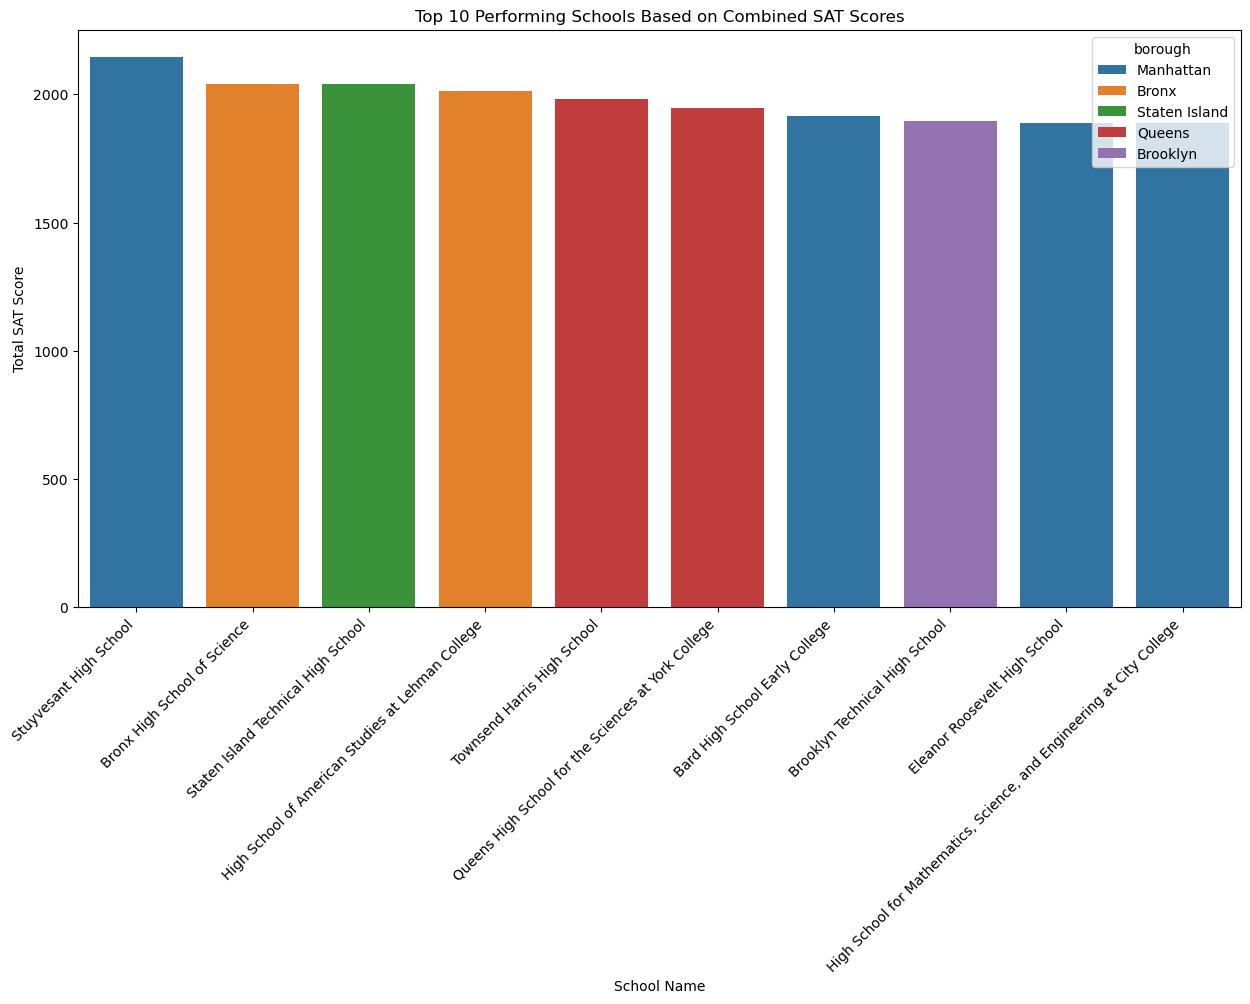

In [60]:
# NYC schools with the best math results which is an average_math >= 80% of 800 (i.e., 640)
best_maths_score = school[["school_name", "average_math"]][school["average_math"] >= 640]
# Sort by average_math in descending order
sorted_maths_score = best_maths_score.sort_values(by='average_math', ascending=False)
print(sorted_maths_score)

# Caculate Top 10 performing schools based on the combined SAT scores
school["total_SAT"] = school[["average_math", "average_reading", "average_writing"]].sum(axis=1)
# Select school_name and total_SAT, then sort and get top 10
schools = school[['school_name', 'total_SAT', 'borough']].sort_values("total_SAT", ascending=False)
print(schools.head(10))

# Visualizing the top 10 performing schools based on the combined SAT scores
plt.figure(figsize=(15,7.5))
sns.barplot(data=schools.head(10), x="school_name", y="total_SAT", hue="borough")
plt.title("Top 10 Performing Schools Based on Combined SAT Scores")
plt.xlabel("School Name")
plt.ylabel("Total SAT Score")
plt.xticks(rotation=45, ha='right')
plt.show()

## Which single borough has the largest standard deviation in the combined SAT score?

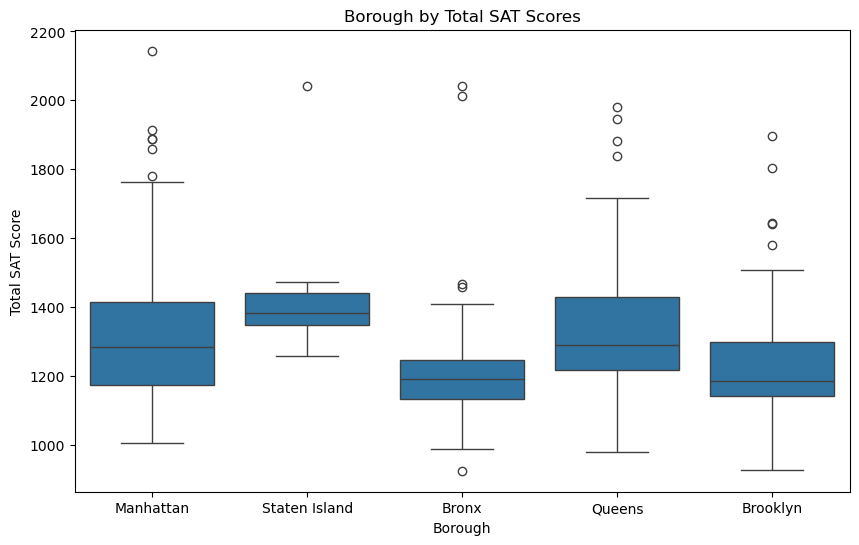

     borough  borough_std
0  Manhattan    230.29414
1  Manhattan    230.29414
2  Manhattan    230.29414
3  Manhattan    230.29414
4  Manhattan    230.29414
borough        Staten Island
borough_std        230.29414
dtype: object


C:\Users\NEW USER\AppData\Local\Temp\ipykernel_10212\2318954506.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=school, x="borough", y="borough_std", ci=None)


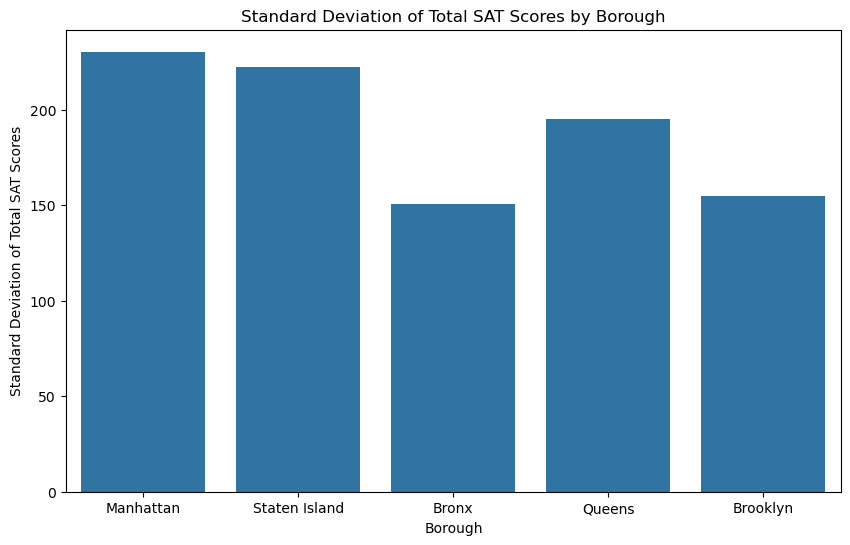

In [61]:
# Visualizing borough by total SAT scores
plt.figure(figsize=(10,6))
sns.boxplot(data=school, x="borough", y="total_SAT")
plt.title("Borough by Total SAT Scores")
plt.xlabel("Borough")
plt.ylabel("Total SAT Score")
plt.show()
 
# Group of borough with std of total SAT score
school['borough_std'] = school.groupby("borough")["total_SAT"].transform(lambda x: x.std())
print(school[["borough", "borough_std"]].head())

# Borough with largest standard deviation in the combined SAT score
print(school[["borough", "borough_std"]].max())

# Visualizing the standard deviation of total SAT scores by borough
plt.figure(figsize=(10,6))
sns.barplot(data=school, x="borough", y="borough_std", ci=None)
plt.title("Standard Deviation of Total SAT Scores by Borough")
plt.xlabel("Borough")
plt.ylabel("Standard Deviation of Total SAT Scores")
plt.show()